In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import IPython.display


In [2]:
df = pd.read_excel("../Data/processed/firearm_data_cleaned.xlsx")
df.head()

,year,state,state_name,rate,deaths,high_risk,rate_change,law_strength_change,restrictive_ratio,permissive_ratio,...,class_permissive_firearm_removal_at_scene_of_domestic_violence,class_permissive_firearms_in_college_university,class_permissive_child_access_laws,class_permissive_gun_trafficking,class_permissive_open_carry,class_permissive_required_reporting_of_lost_or_stolen_firearms,class_permissive_safety_training_required,class_permissive_untraceable_firearms,class_permissive_permit_to_purchase,class_permissive_firearms_in_k_12_educational_settings
0,2014,AK,Alaska,19.2,145,1,NaN,NaN,0.72,0.28,...,0,0,0,0,0,0,0,0,0,0
1,2015,AK,Alaska,23.4,177,1,4.2,0.0,0.72,0.28,...,0,0,0,0,0,0,0,0,0,0
2,2016,AK,Alaska,23.3,177,1,-0.1,0.0,0.72,0.28,...,0,0,0,0,0,0,0,0,0,0
3,2017,AK,Alaska,24.5,180,1,1.2,0.0,0.72,0.28,...,0,0,0,0,0,0,0,0,0,0
4,2018,AK,Alaska,21.0,155,1,-3.5,0.0,0.72,0.28,...,0,0,0,0,0,0,0,0,0,0


# Basic Descriptive Statistics

## Categorical Variables Summary

In [4]:
df[["year", "rate", "deaths", "law_strength_score", "restrictive_laws", "permissive_laws"]].describe()

,year,rate,deaths,law_strength_score,restrictive_laws,permissive_laws
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,2018.515936,14.011753,828.041833,21.737052,28.615538,6.878486
std,2.880651,5.769315,808.573656,13.611467,13.529800,1.868740
min,2014.000000,2.500000,34.000000,6.000000,12.000000,3.000000
25%,2016.000000,10.500000,225.250000,13.000000,20.000000,6.000000
50%,2019.000000,13.600000,614.500000,17.000000,24.000000,7.000000
75%,2021.000000,17.675000,1137.500000,25.000000,32.000000,8.000000
max,2023.000000,33.900000,4630.000000,68.000000,77.000000,12.000000


In [ ]:
## Categorical Counts
print(df['year'].value_counts())
print(df['state_name'].value_counts())

year
2022    51
2023    51
2014    50
2015    50
2016    50
2017    50
2018    50
2019    50
2020    50
2021    50
Name: count, dtype: int64
state_name
Alaska                  10
Pennsylvania            10
North Dakota            10
Nebraska                10
New Hampshire           10
New Jersey              10
New Mexico              10
Nevada                  10
New York                10
Ohio                    10
Oklahoma                10
Oregon                  10
Rhode Island            10
Montana                 10
South Carolina          10
South Dakota            10
Tennessee               10
Texas                   10
Utah                    10
Virginia                10
Vermont                 10
Washington              10
Wisconsin               10
West Virginia           10
North Carolina          10
Mississippi             10
Alabama                 10
Missouri                10
Arkansas                10
Arizona                 10
California              10
Colorado   

## Distribution Visualizations

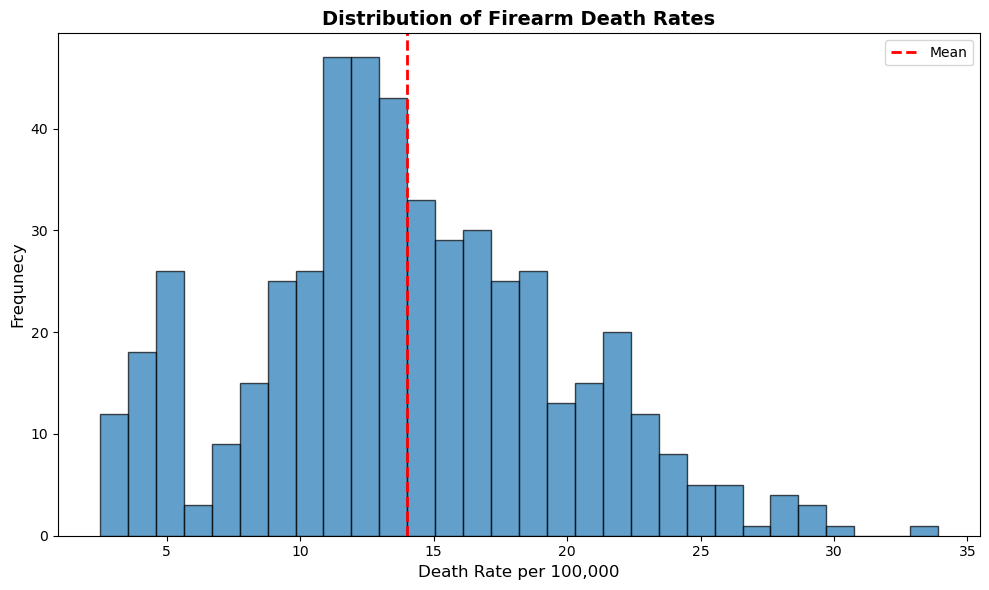

In [ ]:
# histogram of death rates
fig, ax = plt.subplots(figsize = (10, 6))

ax.hist(df['rate'].dropna(), bins = 30, edgecolor = 'black', alpha = 0.7)
ax.axvline(df['rate'].mean(), color = 'r', linestyle = 'dashed', linewidth = 2,
           label = 'Mean')
ax.set_xlabel('Death Rate per 100,000', fontsize = 12)
ax.set_ylabel('Frequnecy', fontsize = 12)
ax.set_title('Distribution of Firearm Death Rates', fontsize = 14, fontweight = 'bold')
ax.legend()
plt.tight_layout()
plt.show()

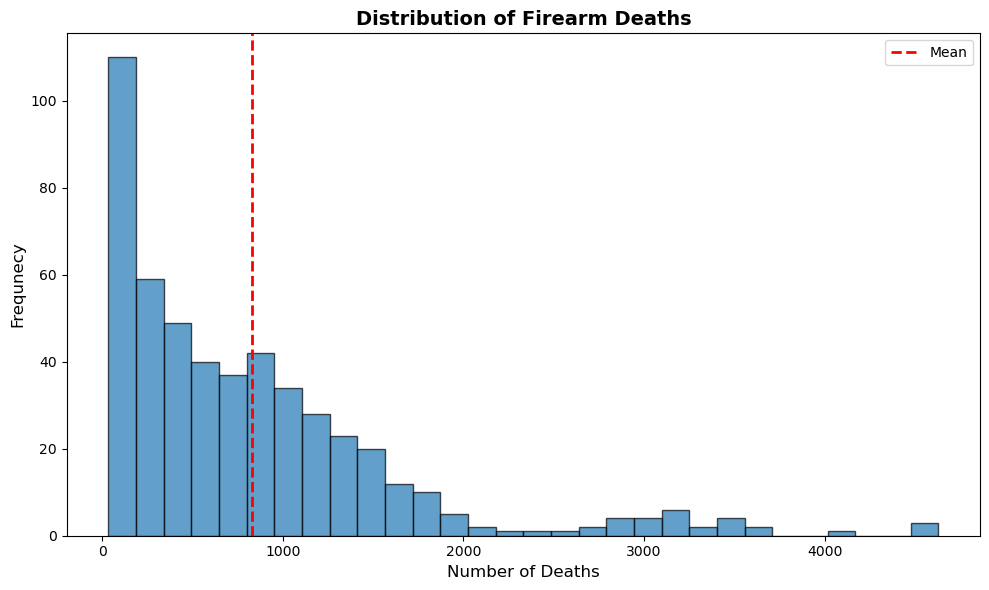

In [ ]:
# histogram of death counts
fig, ax = plt.subplots(figsize = (10, 6))

ax.hist(df['deaths'].dropna(), bins = 30, edgecolor = 'black', alpha = 0.7)
ax.axvline(df['deaths'].mean(), color = 'r', linestyle = 'dashed', linewidth = 2,
           label = 'Mean')
ax.set_xlabel('Number of Deaths', fontsize = 12)
ax.set_ylabel('Frequnecy', fontsize = 12)
ax.set_title('Distribution of Firearm Deaths', fontsize = 14, fontweight = 'bold')
ax.legend()
plt.tight_layout()
plt.show()

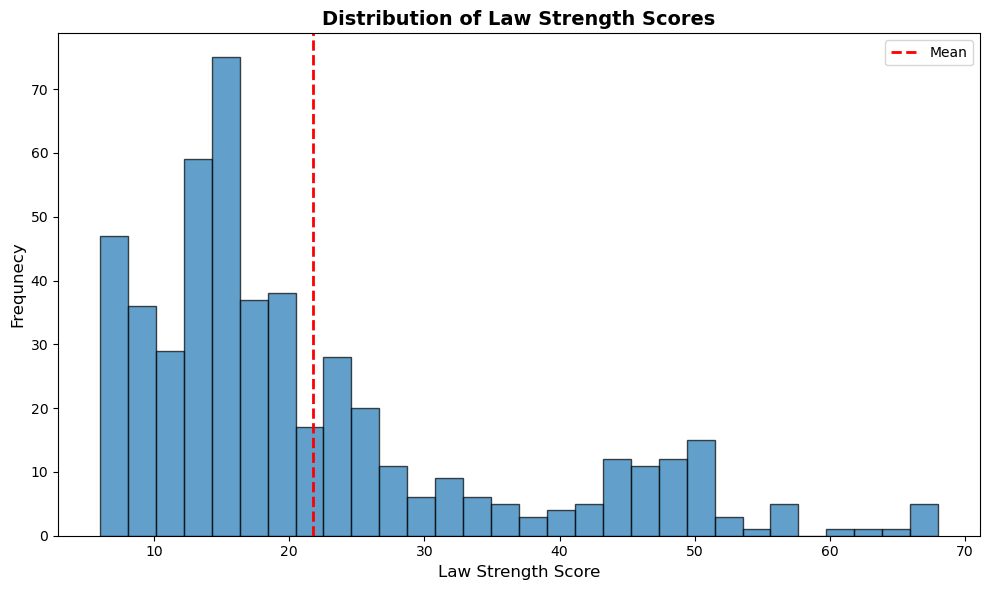

In [ ]:
# histogram of law strength score
fig, ax = plt.subplots(figsize = (10, 6))

ax.hist(df['law_strength_score'].dropna(), bins = 30, edgecolor = 'black', alpha = 0.7)
ax.axvline(df['law_strength_score'].mean(), color = 'r', linestyle = 'dashed', linewidth = 2,
           label = 'Mean')
ax.set_xlabel('Law Strength Score', fontsize = 12)
ax.set_ylabel('Frequnecy', fontsize = 12)
ax.set_title('Distribution of Law Strength Scores', fontsize = 14, fontweight = 'bold')
ax.legend()
plt.tight_layout()
plt.show()

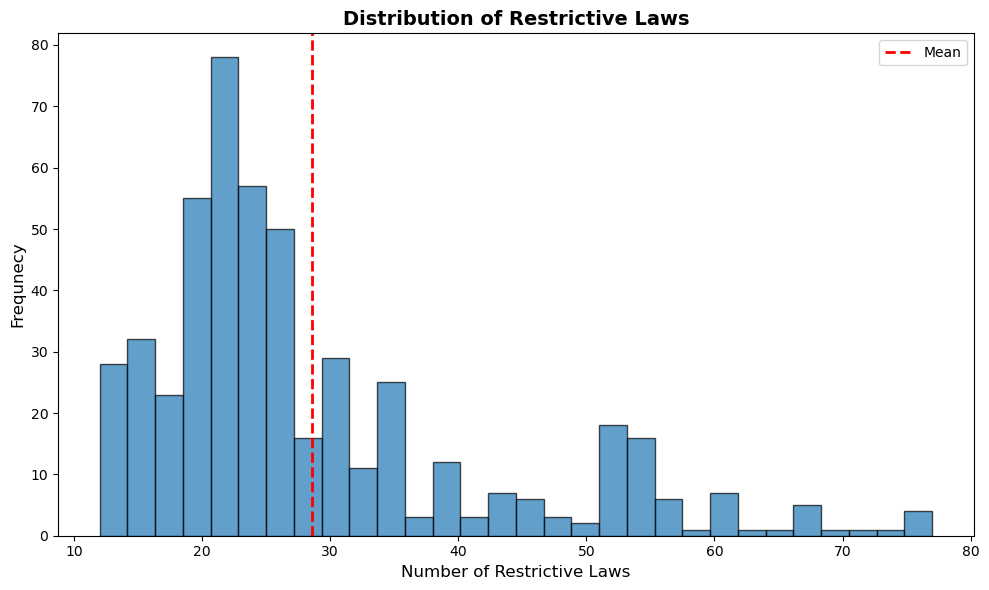

In [ ]:
# histogram of restrictive laws
fig, ax = plt.subplots(figsize = (10, 6))

ax.hist(df['restrictive_laws'].dropna(), bins = 30, edgecolor = 'black', alpha = 0.7)
ax.axvline(df['restrictive_laws'].mean(), color = 'r', linestyle = 'dashed', linewidth = 2,
           label = 'Mean')
ax.set_xlabel('Number of Restrictive Laws', fontsize = 12)
ax.set_ylabel('Frequnecy', fontsize = 12)
ax.set_title('Distribution of Restrictive Laws', fontsize = 14, fontweight = 'bold')
ax.legend()
plt.tight_layout()
plt.show()

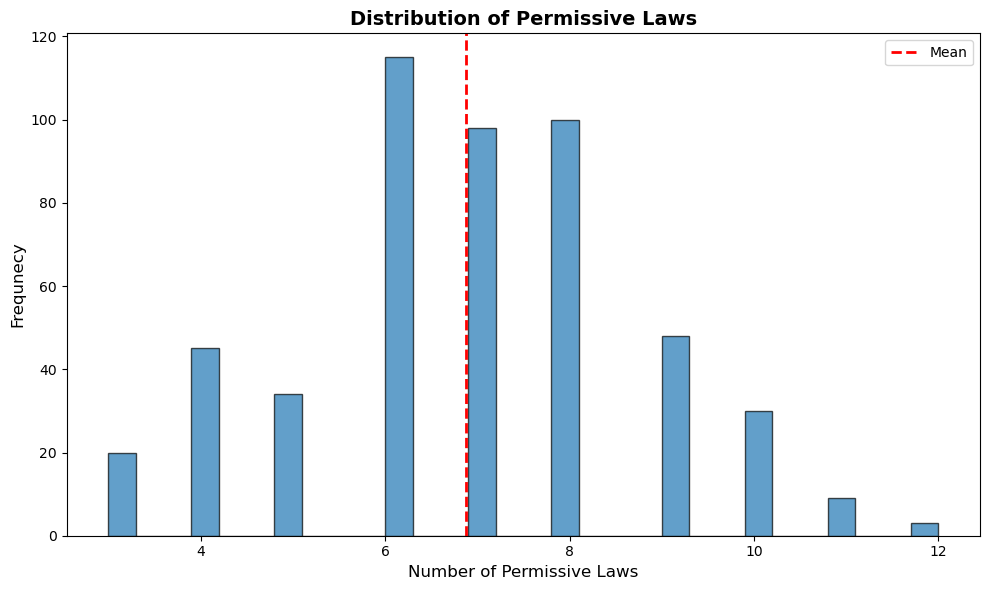

In [ ]:
# histogram of permissive laws
fig, ax = plt.subplots(figsize = (10, 6))

ax.hist(df['permissive_laws'].dropna(), bins = 30, edgecolor = 'black', alpha = 0.7)
ax.axvline(df['permissive_laws'].mean(), color = 'r', linestyle = 'dashed', linewidth = 2,
           label = 'Mean')
ax.set_xlabel('Number of Permissive Laws', fontsize = 12)
ax.set_ylabel('Frequnecy', fontsize = 12)
ax.set_title('Distribution of Permissive Laws', fontsize = 14, fontweight = 'bold')
ax.legend()
plt.tight_layout()
plt.show()

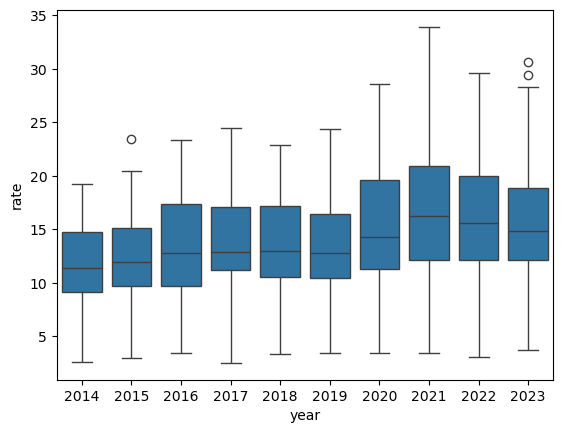

In [8]:
# Boxplot of Year by Rate
sns.boxplot(x='year', y='rate', data=df)
plt.show()

In [9]:
# NA Values
df[['state_name','year', 'deaths', 'rate', 'law_strength_score', 'restrictive_laws', 'permissive_laws']].isna().sum()

state_name            0
year                  0
deaths                0
rate                  0
law_strength_score    0
restrictive_laws      0
permissive_laws       0
dtype: int64

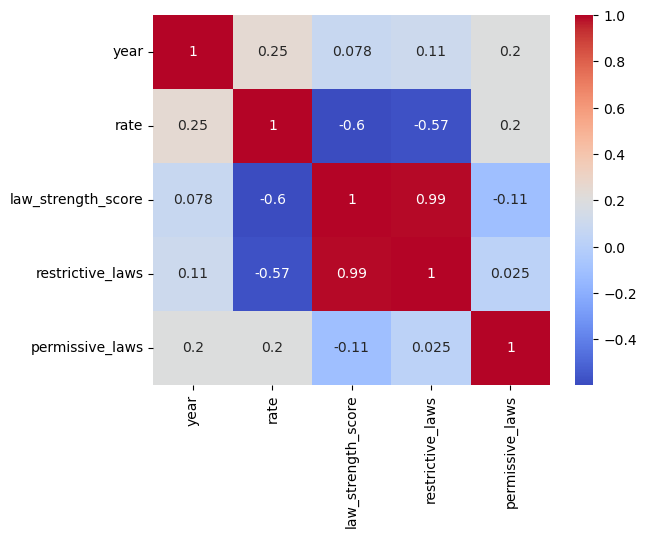

In [10]:
# Correlation Heatmap
correlation_matrix = df[['year', 'rate', 'law_strength_score', 'restrictive_laws', 'permissive_laws']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Deaths Rates by Law Categories

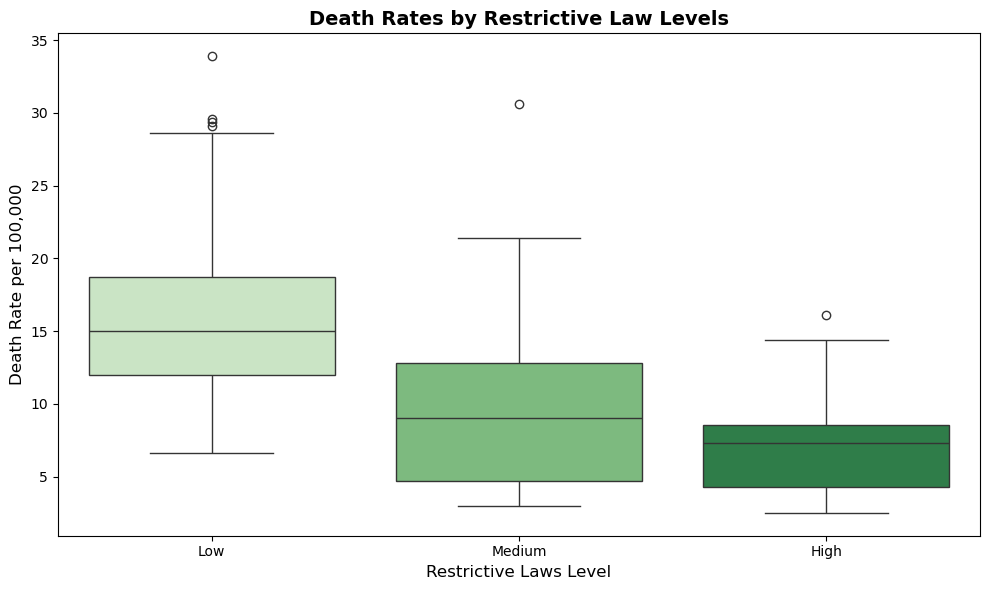

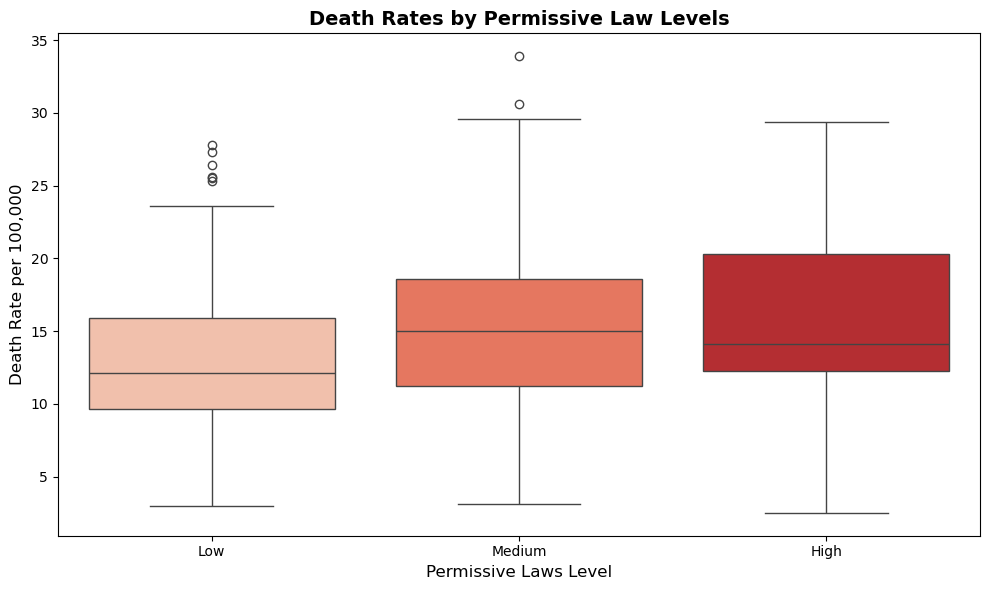

In [68]:
# Create categories for analysis
df['restrictive_category'] = pd.cut(df['restrictive_laws'], 
                                               bins=3, 
                                               labels=['Low', 'Medium', 'High'])
df['permissive_category'] = pd.cut(df['permissive_laws'], 
                                              bins=3, 
                                              labels=['Low', 'Medium', 'High'])

# Boxplot: Death rates by restrictive law levels
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x='restrictive_category', y='rate', 
            palette='Greens', ax=ax, hue='restrictive_category')
ax.set_xlabel('Restrictive Laws Level', fontsize=12)
ax.set_ylabel('Death Rate per 100,000', fontsize=12)
ax.set_title('Death Rates by Restrictive Law Levels', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Boxplot: Death rates by permissive law levels
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x='permissive_category', y='rate', 
            palette='Reds', ax=ax, hue='permissive_category')
ax.set_xlabel('Permissive Laws Level', fontsize=12)
ax.set_ylabel('Death Rate per 100,000', fontsize=12)
ax.set_title('Death Rates by Permissive Law Levels', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


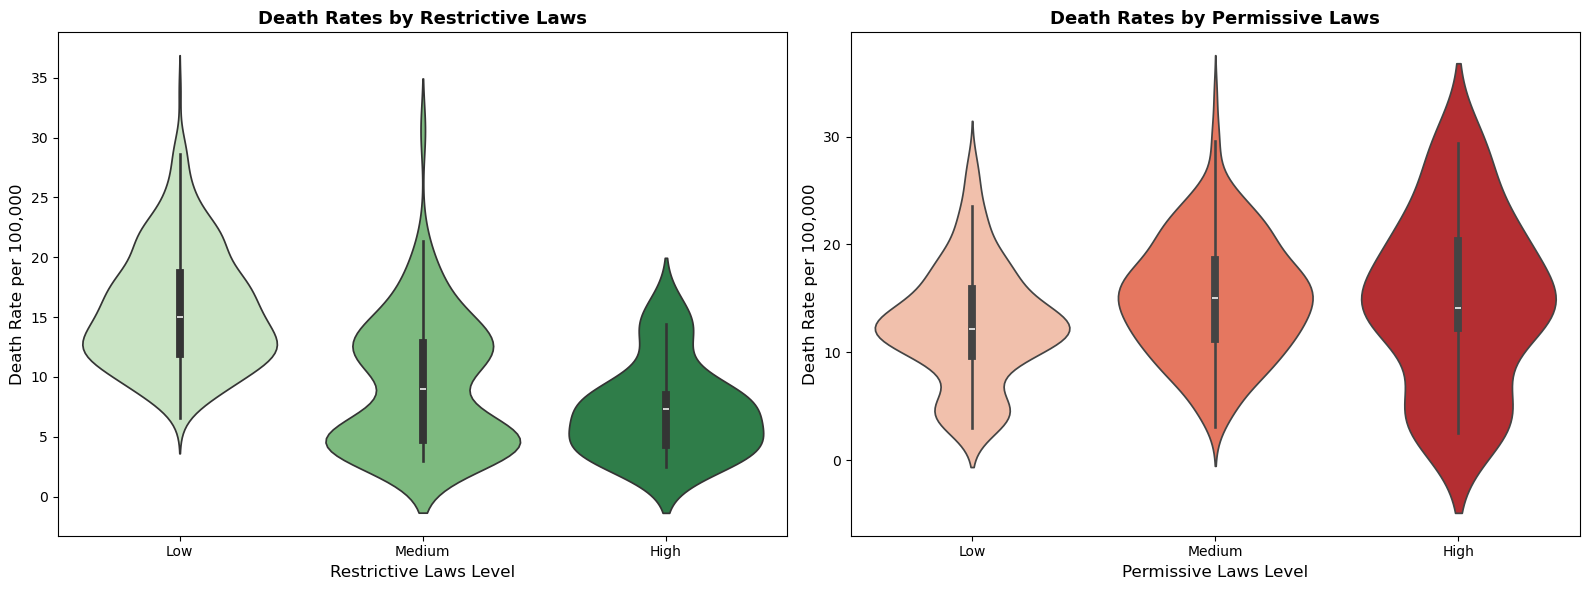

In [ ]:
# Side-by-side violin plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.violinplot(data=df, x='restrictive_category', y='rate', 
               palette='Greens', ax=axes[0], hue = 'restrictive_category')
axes[0].set_xlabel('Restrictive Laws Level', fontsize=12)
axes[0].set_ylabel('Death Rate per 100,000', fontsize=12)
axes[0].set_title('Death Rates by Restrictive Laws', fontsize=13, fontweight='bold')

sns.violinplot(data=df, x='permissive_category', y='rate', 
               palette='Reds', ax=axes[1], hue = 'permissive_category')
axes[1].set_xlabel('Permissive Laws Level', fontsize=12)
axes[1].set_ylabel('Death Rate per 100,000', fontsize=12)
axes[1].set_title('Death Rates by Permissive Laws', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

## Temporal Trends

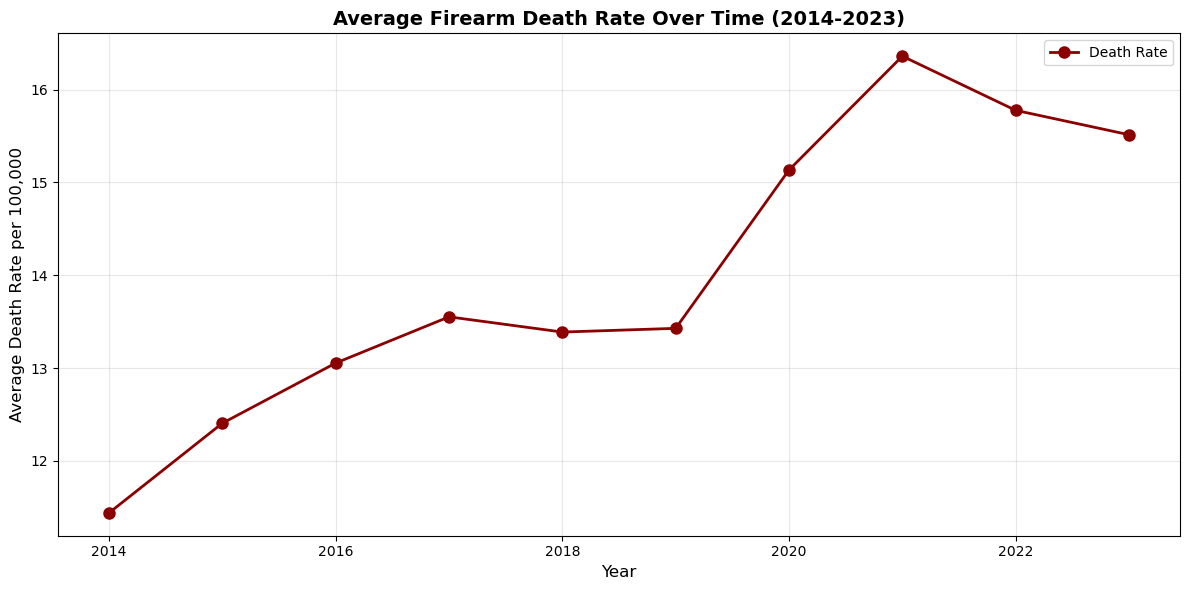

In [71]:
# Overall trend over time
temporal_summary = df.groupby('year').agg({
    'rate': 'mean',
    'restrictive_laws': 'mean',
    'permissive_laws': 'mean',
    'law_strength_score': 'mean'
}).reset_index()

# Death rate over time
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(temporal_summary['year'], temporal_summary['rate'], 
        color='darkred', linewidth=2, marker='o', markersize=8, label='Death Rate')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Average Death Rate per 100,000', fontsize=12)
ax.set_title('Average Firearm Death Rate Over Time (2014-2023)', 
             fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


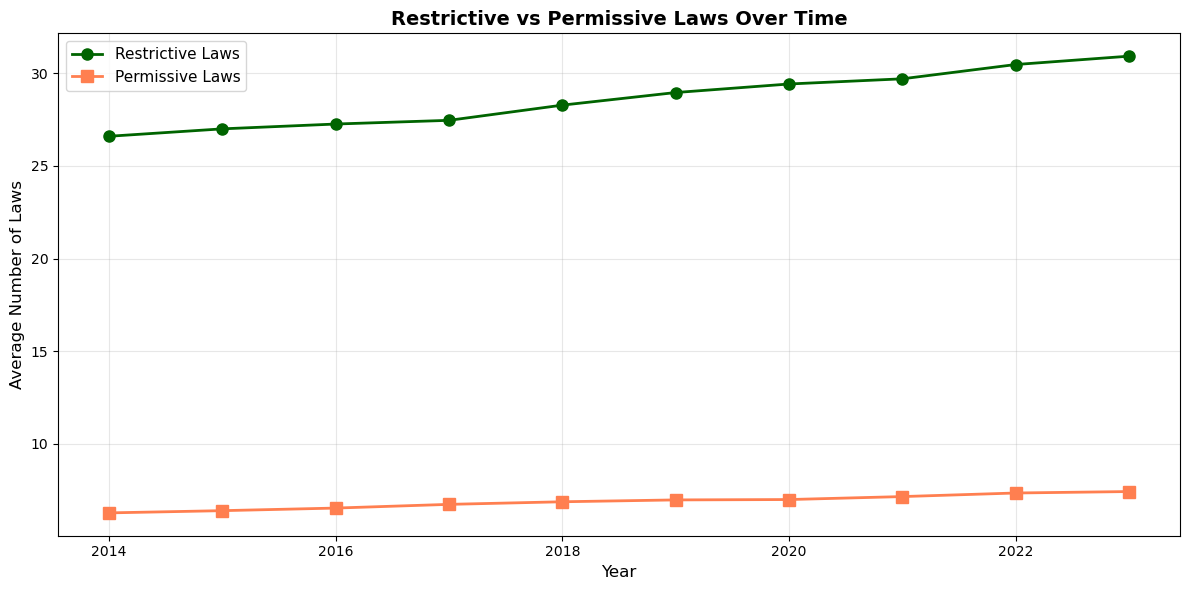

In [72]:
# Law trends over time
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(temporal_summary['year'], temporal_summary['restrictive_laws'], 
        color='darkgreen', linewidth=2, marker='o', markersize=8, label='Restrictive Laws')
ax.plot(temporal_summary['year'], temporal_summary['permissive_laws'], 
        color='coral', linewidth=2, marker='s', markersize=8, label='Permissive Laws')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Average Number of Laws', fontsize=12)
ax.set_title('Restrictive vs Permissive Laws Over Time', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

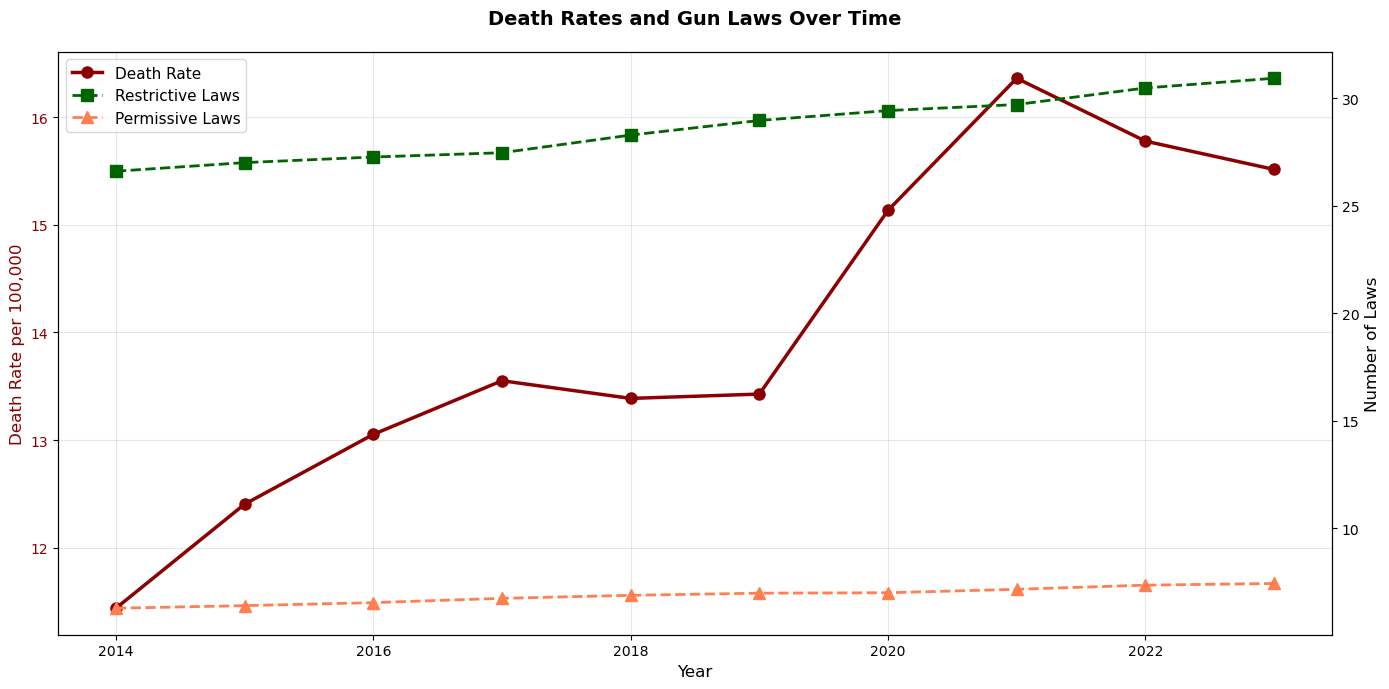

In [73]:
# Combined view: All three metrics
fig, ax1 = plt.subplots(figsize=(14, 7))

# Death rate on primary y-axis
color1 = 'darkred'
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Death Rate per 100,000', color=color1, fontsize=12)
line1 = ax1.plot(temporal_summary['year'], temporal_summary['rate'], 
                 color=color1, linewidth=2.5, marker='o', markersize=8, 
                 label='Death Rate')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3)

# Law counts on secondary y-axis
ax2 = ax1.twinx()
color2 = 'darkgreen'
color3 = 'coral'
ax2.set_ylabel('Number of Laws', fontsize=12)
line2 = ax2.plot(temporal_summary['year'], temporal_summary['restrictive_laws'], 
                 color=color2, linewidth=2, marker='s', markersize=8, 
                 label='Restrictive Laws', linestyle='--')
line3 = ax2.plot(temporal_summary['year'], temporal_summary['permissive_laws'], 
                 color=color3, linewidth=2, marker='^', markersize=8, 
                 label='Permissive Laws', linestyle='--')

# Combine legends
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=11)

plt.title('Death Rates and Gun Laws Over Time', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## Gun Law Analytics

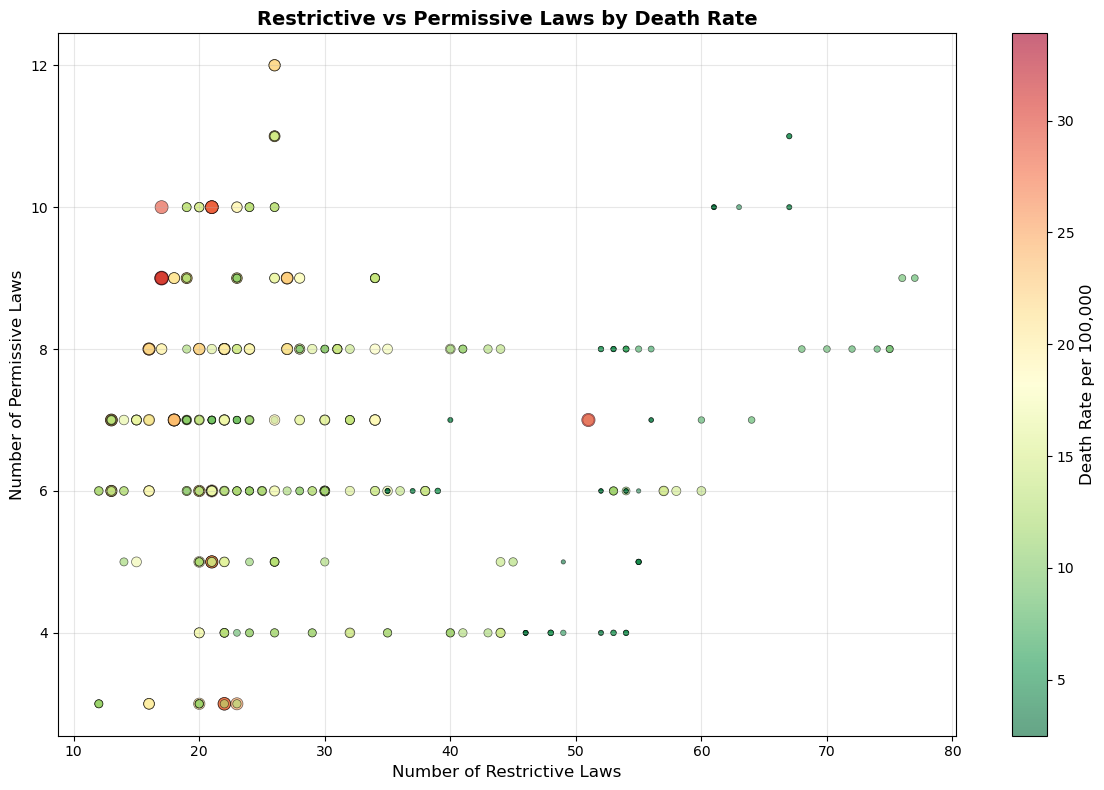

In [76]:
# Restrictive vs Permissive Laws scatter with death rate coloring
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(df['restrictive_laws'], 
                     df['permissive_laws'],
                     c=df['rate'], s=df['rate']*3,
                     cmap='RdYlGn_r', alpha=0.6, edgecolors='black', linewidth=0.5)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Death Rate per 100,000', fontsize=12)
ax.set_xlabel('Number of Restrictive Laws', fontsize=12)
ax.set_ylabel('Number of Permissive Laws', fontsize=12)
ax.set_title('Restrictive vs Permissive Laws by Death Rate', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


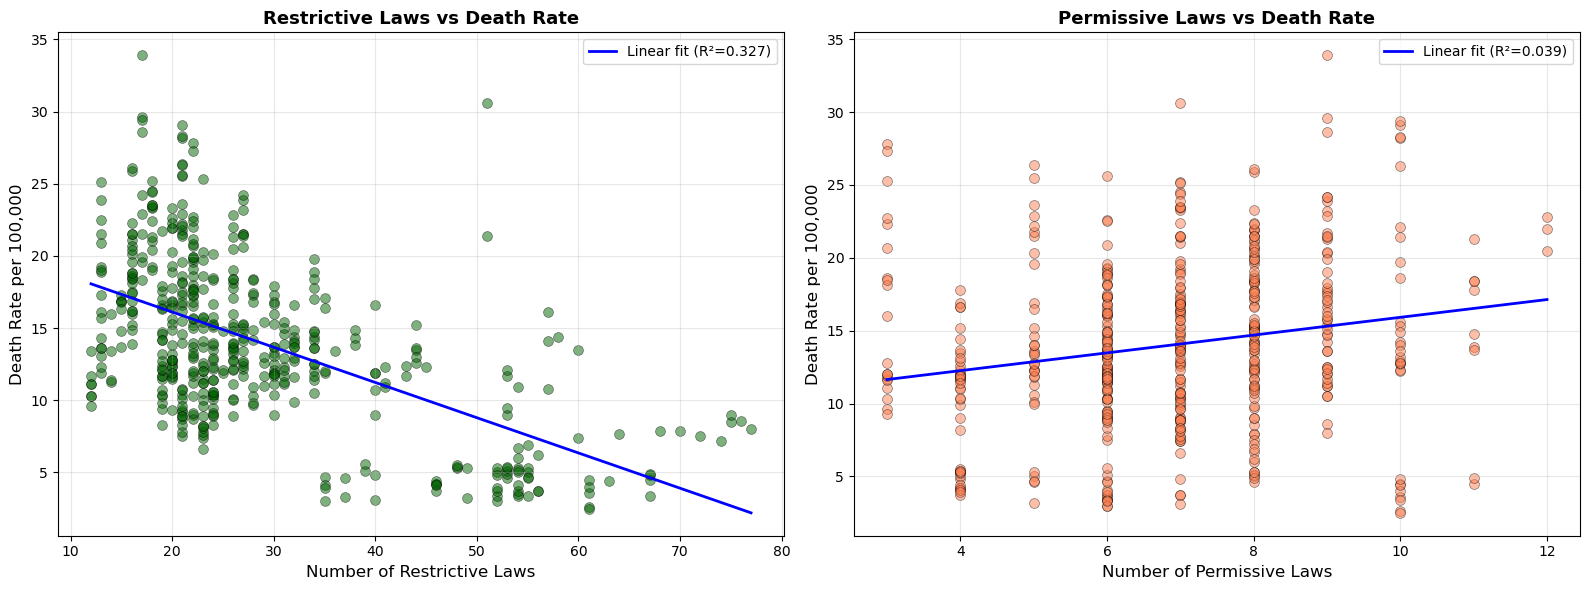


Correlation between Restrictive Laws and Death Rate: -0.5722
Correlation between Permissive Laws and Death Rate: 0.1975


In [ ]:
# Separate scatter plots for each law type vs death rate
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Restrictive laws vs death rate
axes[0].scatter(df['restrictive_laws'], df['rate'], 
                alpha=0.5, color='darkgreen', s=50, edgecolors='black', linewidth=0.5)
# Add regression line
from scipy.stats import linregress
mask1 = ~(df['restrictive_laws'].isna() | df['rate'].isna())
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(
    df.loc[mask1, 'restrictive_laws'], 
    df.loc[mask1, 'rate']
)
line_x1 = np.array([df['restrictive_laws'].min(), 
                    df['restrictive_laws'].max()])
line_y1 = slope1 * line_x1 + intercept1
axes[0].plot(line_x1, line_y1, 'b-', linewidth=2, 
             label=f'Linear fit (R²={r_value1**2:.3f})')
axes[0].set_xlabel('Number of Restrictive Laws', fontsize=12)
axes[0].set_ylabel('Death Rate per 100,000', fontsize=12)
axes[0].set_title('Restrictive Laws vs Death Rate', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Permissive laws vs death rate
axes[1].scatter(df['permissive_laws'], df['rate'], 
                alpha=0.5, color='coral', s=50, edgecolors='black', linewidth=0.5)

# Add regression line
mask2 = ~(df['permissive_laws'].isna() | df['rate'].isna())
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(
    df.loc[mask2, 'permissive_laws'], 
    df.loc[mask2, 'rate']
)
line_x2 = np.array([df['permissive_laws'].min(), 
                    df['permissive_laws'].max()])
line_y2 = slope2 * line_x2 + intercept2
axes[1].plot(line_x2, line_y2, 'b-', linewidth=2, 
             label=f'Linear fit (R²={r_value2**2:.3f})')
axes[1].set_xlabel('Number of Permissive Laws', fontsize=12)
axes[1].set_ylabel('Death Rate per 100,000', fontsize=12)
axes[1].set_title('Permissive Laws vs Death Rate', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print correlation coefficients
print(f"\nCorrelation between Restrictive Laws and Death Rate: {df['restrictive_laws']\
                                                                .corr(df['rate']):.4f}")
print(f"Correlation between Permissive Laws and Death Rate: {df['permissive_laws']\
                                                             .corr(df['rate']):.4f}")


## Law Strength Analysis

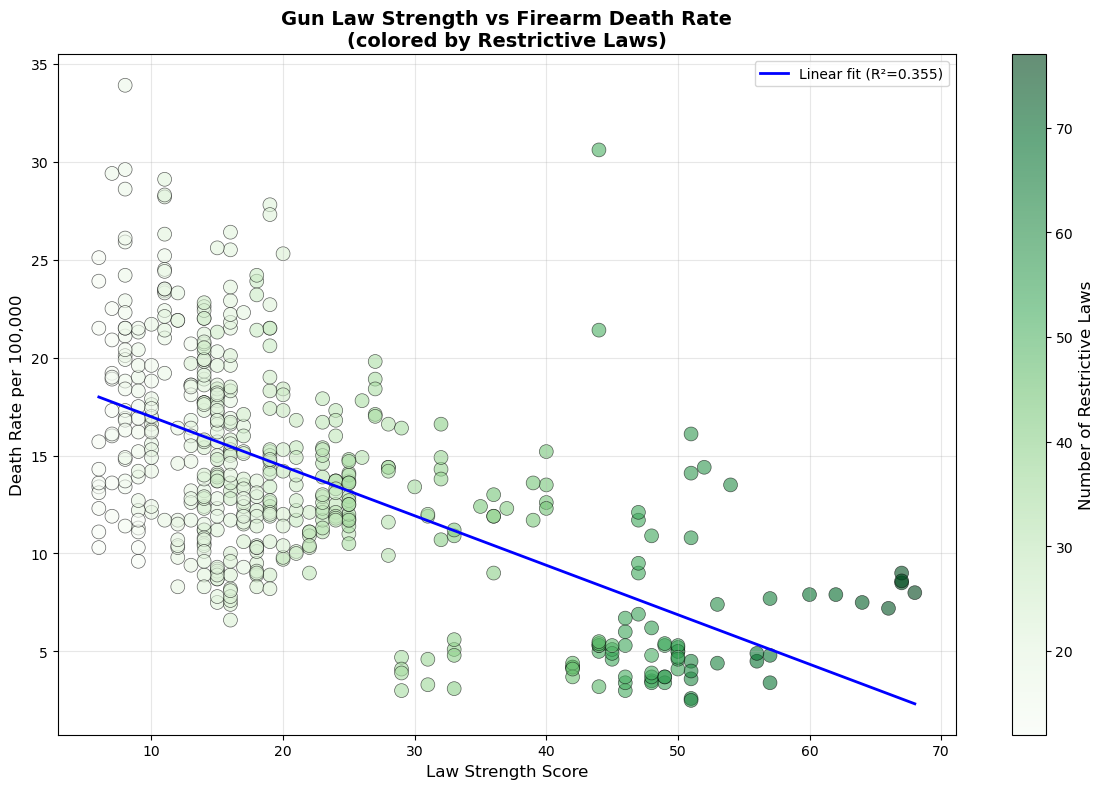

In [79]:
# Law Strength vs Death Rate
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(df['law_strength_score'], df['rate'], 
                     c=df['restrictive_laws'], s=100,
                     cmap='Greens', alpha=0.6, edgecolors='black', linewidth=0.5)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Number of Restrictive Laws', fontsize=12)

# Add regression line
mask = ~(df['law_strength_score'].isna() | df['rate'].isna())
slope, intercept, r_value, p_value, std_err = linregress(
    df.loc[mask, 'law_strength_score'], 
    df.loc[mask, 'rate']
)
line_x = np.array([df['law_strength_score'].min(), 
                   df['law_strength_score'].max()])
line_y = slope * line_x + intercept
ax.plot(line_x, line_y, 'b-', linewidth=2, label=f'Linear fit (R²={r_value**2:.3f})')

ax.set_xlabel('Law Strength Score', fontsize=12)
ax.set_ylabel('Death Rate per 100,000', fontsize=12)
ax.set_title('Gun Law Strength vs Firearm Death Rate\n(colored by Restrictive Laws)', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


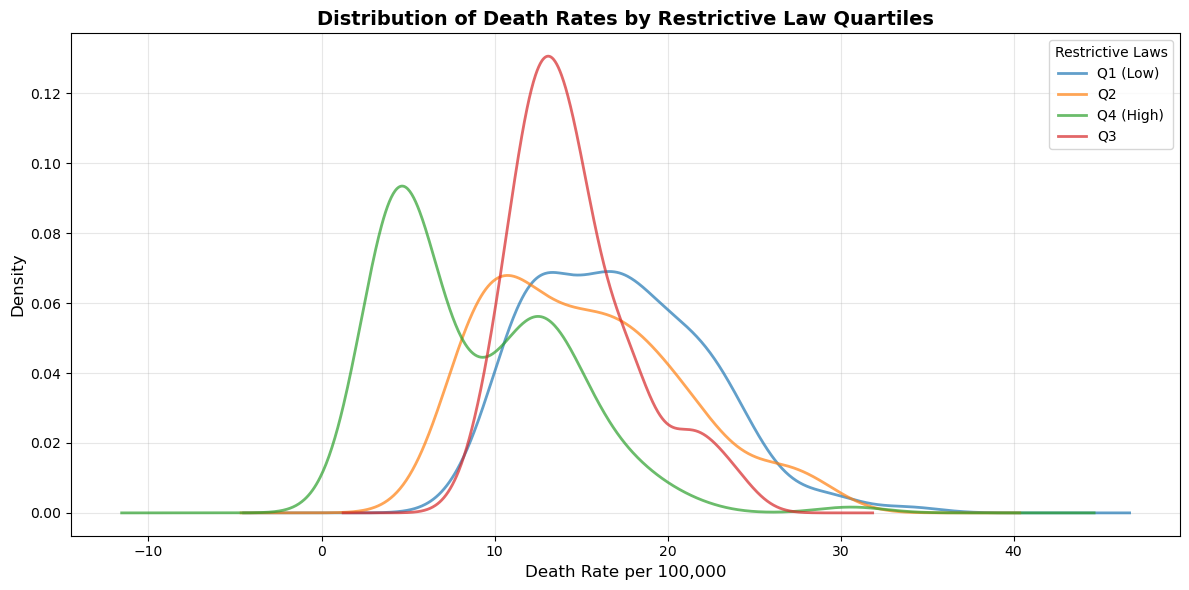

In [80]:
# Density plot comparison
fig, ax = plt.subplots(figsize=(12, 6))

# Create quartiles for restrictive laws
df['restrictive_quartile'] = pd.qcut(df['restrictive_laws'], 
                                                 q=4, 
                                                 labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'])

for quartile in df['restrictive_quartile'].unique():
    if pd.notna(quartile):
        data = df[df['restrictive_quartile'] == quartile]['rate']
        data.dropna().plot(kind='density', ax=ax, label=quartile, linewidth=2, alpha=0.7)

ax.set_xlabel('Death Rate per 100,000', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Distribution of Death Rates by Restrictive Law Quartiles', 
             fontsize=14, fontweight='bold')
ax.legend(title='Restrictive Laws', fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Specific Law Categories Analysis

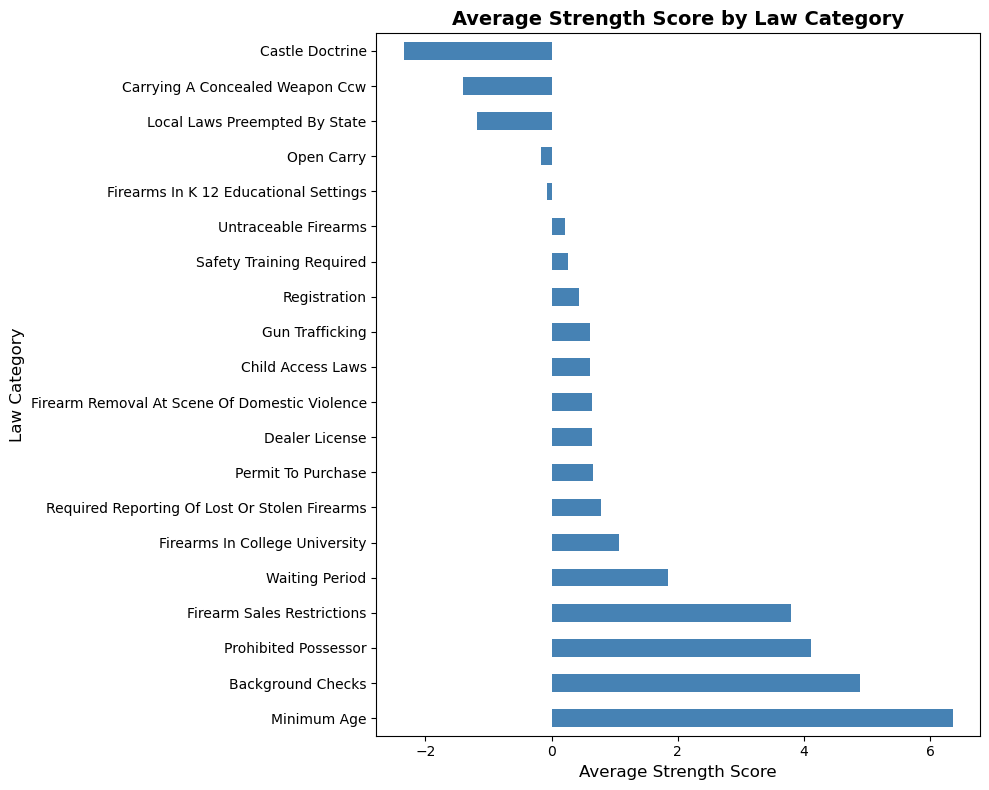

In [81]:
# Get strength variables
strength_cols = [col for col in df.columns if col.startswith('strength_')]

# Calculate average strength by category
strength_avg = df[strength_cols].mean().sort_values(ascending=False)
strength_avg.index = strength_avg.index.str.replace('strength_', '').str.replace('_', ' ').str.title()

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
strength_avg.plot(kind='barh', ax=ax, color='steelblue')
ax.set_xlabel('Average Strength Score', fontsize=12)
ax.set_ylabel('Law Category', fontsize=12)
ax.set_title('Average Strength Score by Law Category', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## State-Level Comparisons

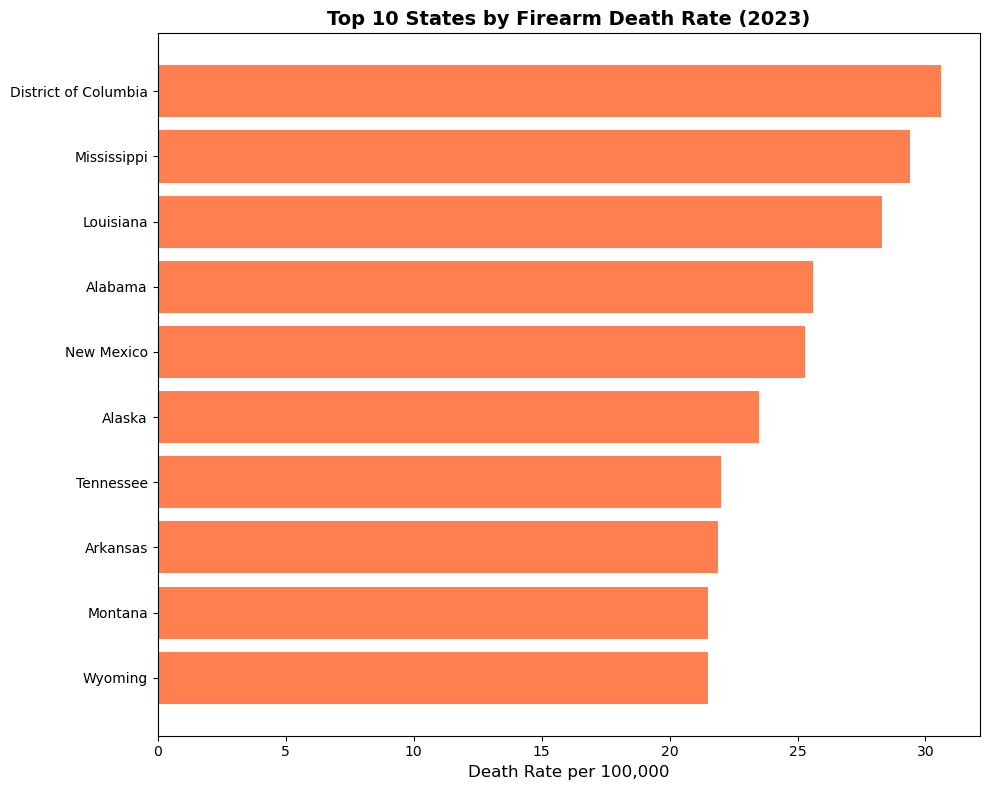

In [83]:
# Get most recent year data
recent_year = df['year'].max()
recent_data = df[df['year'] == recent_year]

# Top 10 states by death rate
top_10 = recent_data.nlargest(10, 'rate')
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(range(len(top_10)), top_10['rate'].values, color='coral')
ax.set_yticks(range(len(top_10)))
ax.set_yticklabels(top_10['state_name'].values)
ax.set_xlabel('Death Rate per 100,000', fontsize=12)
ax.set_title(f'Top 10 States by Firearm Death Rate ({int(recent_year)})', 
             fontsize=14, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

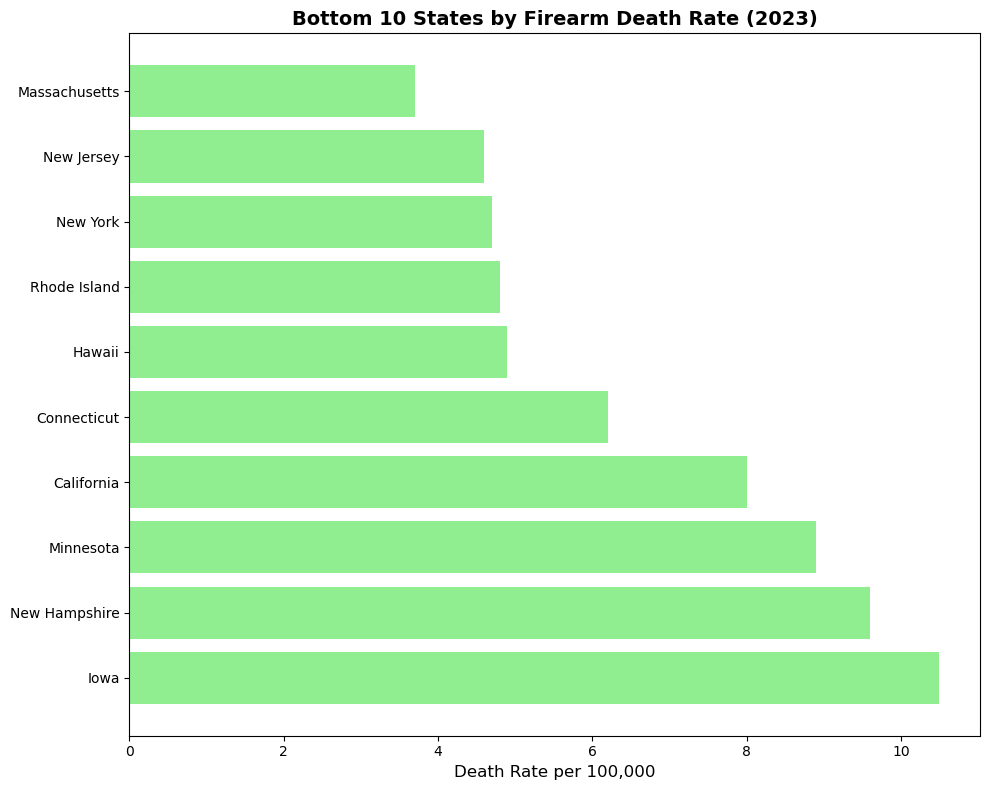

In [84]:
# Bottom 10 states
bottom_10 = recent_data.nsmallest(10, 'rate')
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(range(len(bottom_10)), bottom_10['rate'].values, color='lightgreen')
ax.set_yticks(range(len(bottom_10)))
ax.set_yticklabels(bottom_10['state_name'].values)
ax.set_xlabel('Death Rate per 100,000', fontsize=12)
ax.set_title(f'Bottom 10 States by Firearm Death Rate ({int(recent_year)})', 
             fontsize=14, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

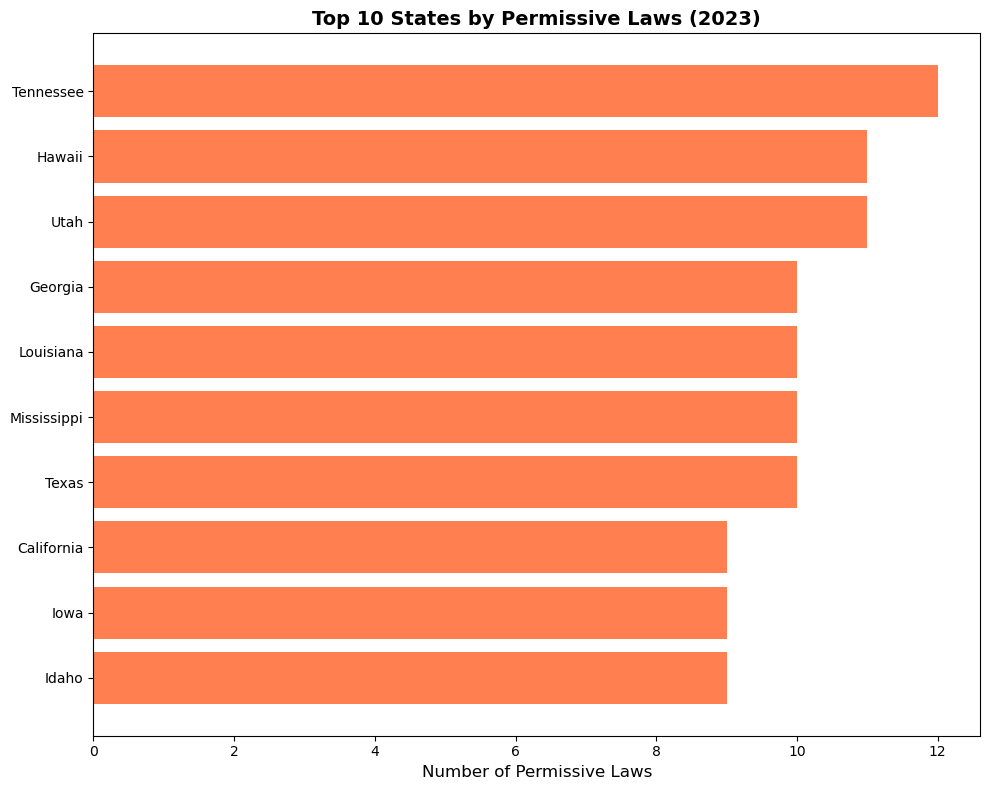

In [85]:
# States with most permissive laws
top_permissive = recent_data.nlargest(10, 'permissive_laws')
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(range(len(top_permissive)), top_permissive['permissive_laws'].values, color='coral')
ax.set_yticks(range(len(top_permissive)))
ax.set_yticklabels(top_permissive['state_name'].values)
ax.set_xlabel('Number of Permissive Laws', fontsize=12)
ax.set_title(f'Top 10 States by Permissive Laws ({int(recent_year)})', 
             fontsize=14, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

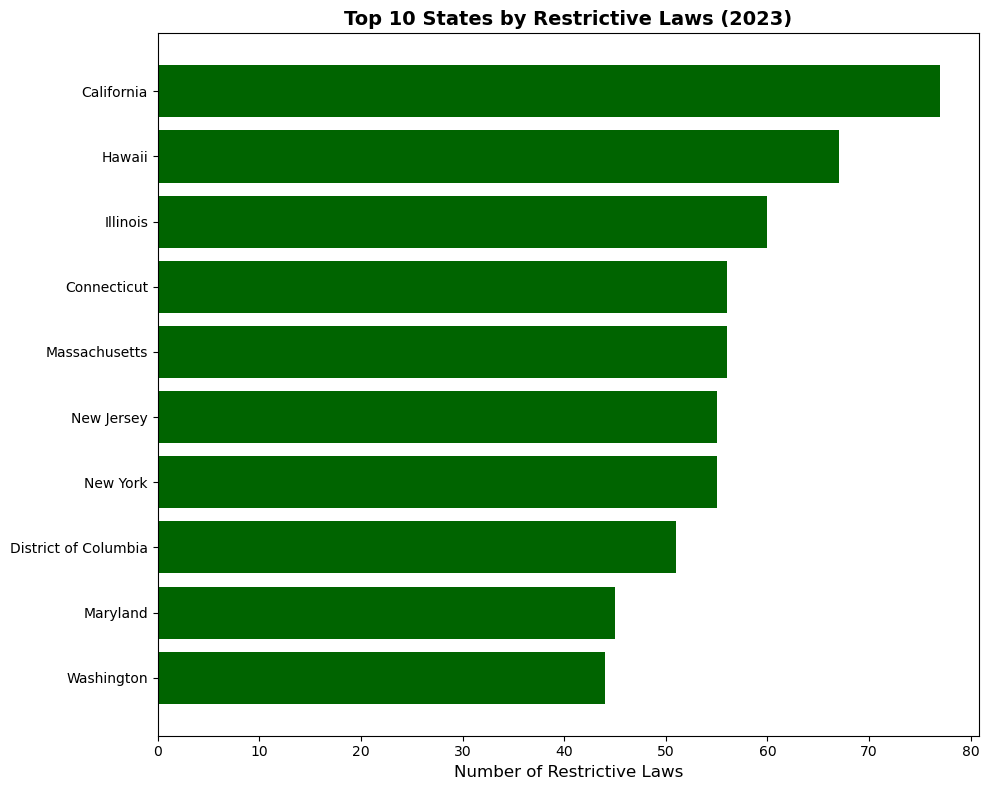

In [90]:
# States with most restrictive laws
top_restrictive = recent_data.nlargest(10, 'restrictive_laws')
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(range(len(top_restrictive)), top_restrictive['restrictive_laws'].values, color='darkgreen')
ax.set_yticks(range(len(top_restrictive)))
ax.set_yticklabels(top_restrictive['state_name'].values)
ax.set_xlabel('Number of Restrictive Laws', fontsize=12)
ax.set_title(f'Top 10 States by Restrictive Laws ({int(recent_year)})', 
             fontsize=14, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.show()


## Correlation Analysis

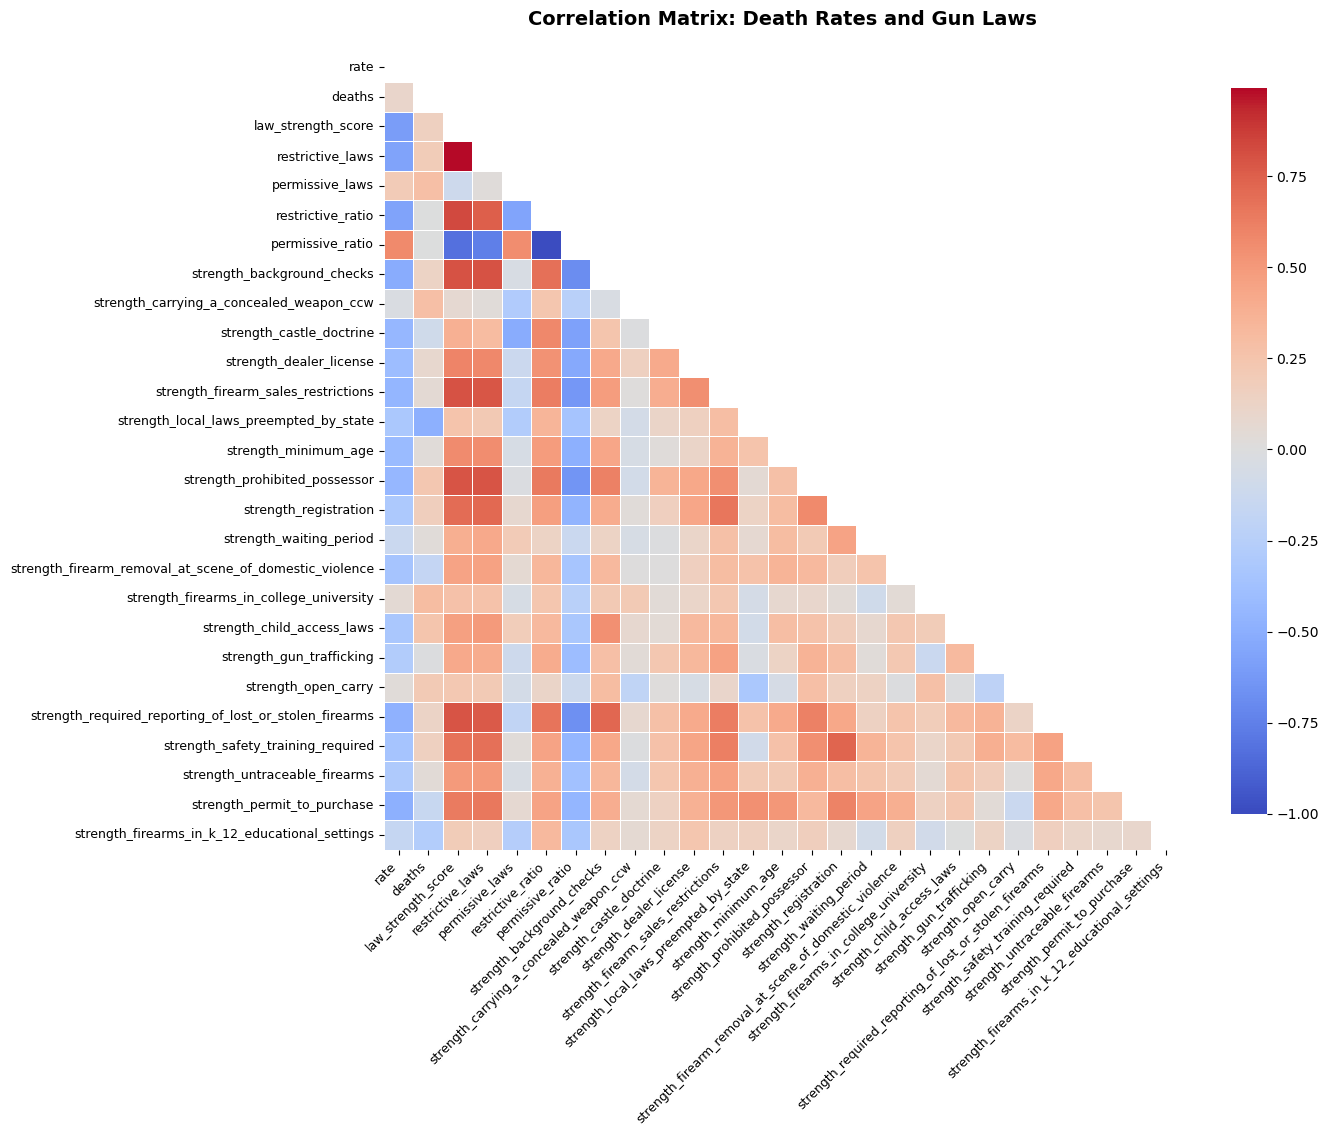


Top 15 correlations with death rate:
                                             Variable  Correlation
0                                  law_strength_score      -0.5959
1                                    restrictive_laws      -0.5722
2                                    permissive_ratio       0.5710
3                                   restrictive_ratio      -0.5710
4                          strength_background_checks      -0.5144
5                         strength_permit_to_purchase      -0.4873
6   strength_required_reporting_of_lost_or_stolen_...      -0.4826
7                 strength_firearm_sales_restrictions      -0.4514
8                            strength_castle_doctrine      -0.4464
9                       strength_prohibited_possessor      -0.4410
10                               strength_minimum_age      -0.4197
11                            strength_dealer_license      -0.4055
12  strength_firearm_removal_at_scene_of_domestic_...      -0.3498
13                  stre

In [87]:
# Select correlation variables
cor_vars = ['rate', 'deaths', 'law_strength_score', 'restrictive_laws', 
            'permissive_laws', 'restrictive_ratio', 'permissive_ratio'] + strength_cols
cor_data = df[cor_vars].dropna(axis=1, how='all')

# Calculate correlation matrix
cor_matrix = cor_data.corr()

# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(14, 12))
mask = np.triu(np.ones_like(cor_matrix, dtype=bool))
sns.heatmap(cor_matrix, mask=mask, annot=False, cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, 
            cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix: Death Rates and Gun Laws', 
             fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

# Top correlations with rate
rate_cors = cor_matrix['rate'].drop('rate').abs().sort_values(ascending=False).head(15)
print("\nTop 15 correlations with death rate:")
correlation_df = pd.DataFrame({
    'Variable': rate_cors.index,
    'Correlation': cor_matrix['rate'][rate_cors.index].values
}).round(4)
print(correlation_df)

# Top correlations with rate
rate_cors = cor_matrix['rate'].drop('rate').abs().sort_values(ascending=False).head(15)
print("\nTop 15 correlations with death rate:")
correlation_df = pd.DataFrame({
    'Variable': rate_cors.index,
    'Correlation': cor_matrix['rate'][rate_cors.index].values
}).round(4)
print(correlation_df)

# Highlight permissive and restrictive laws
print("\n" + "="*50)
print(f"Restrictive Laws correlation with death rate: {cor_matrix.loc['restrictive_laws', 'rate']:.4f}")
print(f"Permissive Laws correlation with death rate: {cor_matrix.loc['permissive_laws', 'rate']:.4f}")
print(f"Law Strength Score correlation with death rate: {cor_matrix.loc['law_strength_score', 'rate']:.4f}")
print("="*50)

## Year-Over-Year Changes

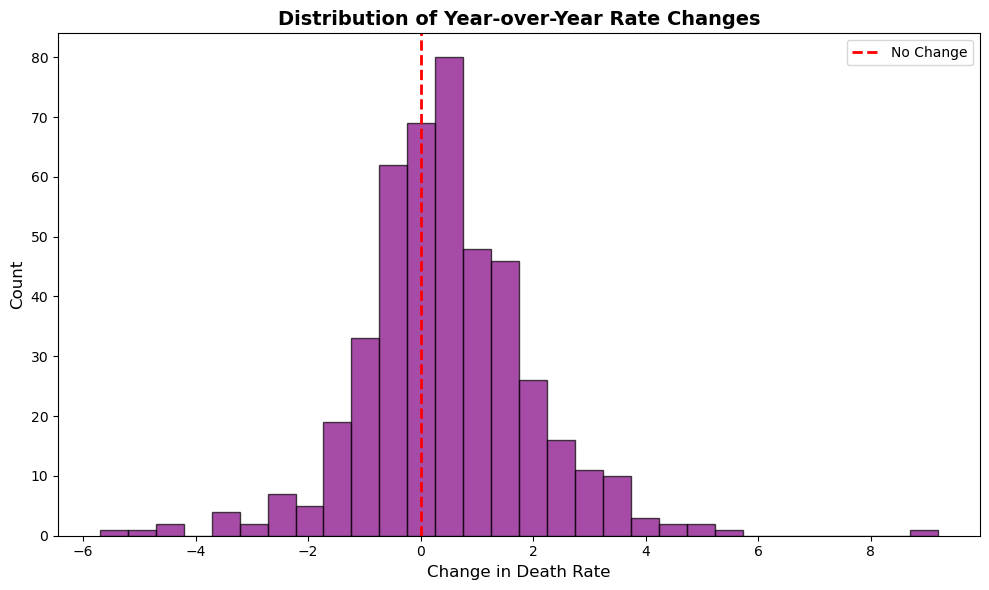

In [88]:
# Rate changes
if 'rate_change' in df.columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    rate_changes = df['rate_change'].dropna()
    ax.hist(rate_changes, bins=30, color='purple', alpha=0.7, edgecolor='black')
    ax.axvline(0, color='red', linestyle='--', linewidth=2, label='No Change')
    ax.set_xlabel('Change in Death Rate', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title('Distribution of Year-over-Year Rate Changes', 
                 fontsize=14, fontweight='bold')
    ax.legend()
    plt.tight_layout()
    plt.show()

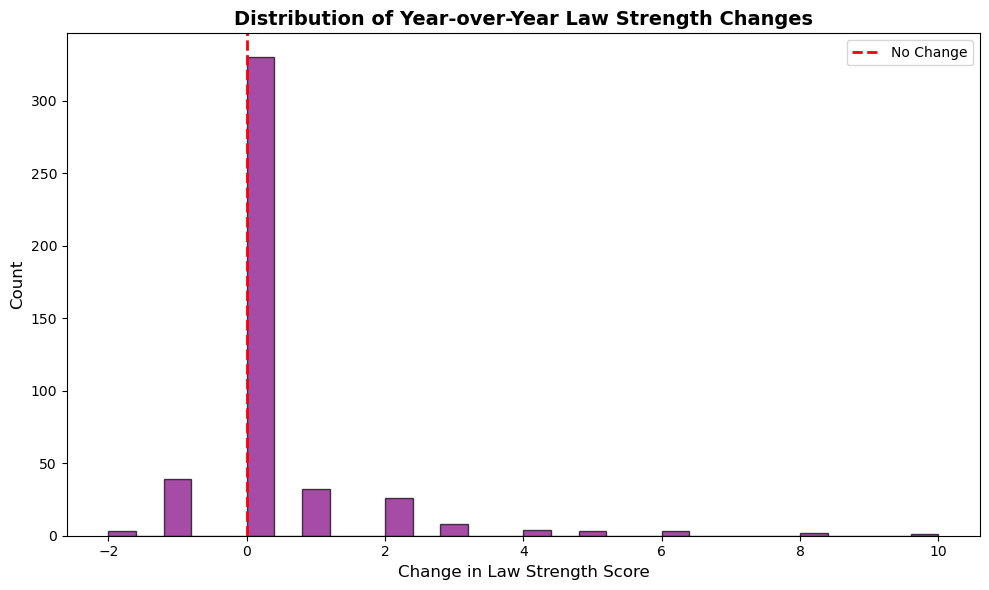

In [89]:

# Law strength changes
if 'law_strength_change' in df.columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    law_changes = df['law_strength_change'].dropna()
    ax.hist(law_changes, bins=30, color='purple', alpha=0.7, edgecolor='black')
    ax.axvline(0, color='red', linestyle='--', linewidth=2, label='No Change')
    ax.set_xlabel('Change in Law Strength Score', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title('Distribution of Year-over-Year Law Strength Changes', 
                 fontsize=14, fontweight='bold')
    ax.legend()
    plt.tight_layout()
    plt.show()

## Summary Statistics Table

In [94]:
# Overall summary
print("\nOverall Summary Statistics:")
print(df[['rate', 'deaths', 'restrictive_laws', 
                    'permissive_laws', 'law_strength_score']].describe())

# By restrictive law quartiles
summary_restrictive = df.groupby('restrictive_quartile').agg({
    'rate': ['count', 'mean', 'std', 'min', 'max'],
    'deaths': 'mean',
    'permissive_laws': 'mean',
    'law_strength_score': 'mean'
}).round(2)

print("\nSummary Statistics by Restrictive Law Quartiles:")
print(summary_restrictive)

# By permissive law quartiles
df['permissive_quartile'] = pd.qcut(df['permissive_laws'], 
                                                q=4, 
                                                labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'])

summary_permissive = df.groupby('permissive_quartile').agg({
    'rate': ['count', 'mean', 'std', 'min', 'max'],
    'deaths': 'mean',
    'restrictive_laws': 'mean',
    'law_strength_score': 'mean'
}).round(2)

print("\nSummary Statistics by Permissive Law Quartiles:")
print(summary_permissive)


Overall Summary Statistics:
             rate       deaths  restrictive_laws  permissive_laws  \
count  502.000000   502.000000        502.000000       502.000000   
mean    14.011753   828.041833         28.615538         6.878486   
std      5.769315   808.573656         13.529800         1.868740   
min      2.500000    34.000000         12.000000         3.000000   
25%     10.500000   225.250000         20.000000         6.000000   
50%     13.600000   614.500000         24.000000         7.000000   
75%     17.675000  1137.500000         32.000000         8.000000   
max     33.900000  4630.000000         77.000000        12.000000   

       law_strength_score  
count          502.000000  
mean            21.737052  
std             13.611467  
min              6.000000  
25%             13.000000  
50%             17.000000  
75%             25.000000  
max             68.000000  

Summary Statistics by Restrictive Law Quartiles:
                      rate                     

C:\Users\chloe\AppData\Local\Temp\ipykernel_28880\1168473590.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_restrictive = df.groupby('restrictive_quartile').agg({
C:\Users\chloe\AppData\Local\Temp\ipykernel_28880\1168473590.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_permissive = df.groupby('permissive_quartile').agg({


In [3]:
strength_col = [col for col in df.columns if col.startswith('strength_')]

recent_year = df['year'].max()
recent_data = df[df['year'] == recent_year]

correlations = recent_data[strength_col + ['rate']].corr()['rate'].drop('rate')

cor_df = pd.DataFrame({
    'law_type': correlations.index,
    'correlation': correlations.values
})

cor_df['law_type_clean'] = (cor_df['law_type']
                            .str.replace('strength_', '')
                            .str.replace('_', ' ')
                            .str.title())

cor_df = cor_df.sort_values('correlation')

print("\nCorrelations with Death Rate for Most Recent Year:")
print(cor_df)   


Correlations with Death Rate for Most Recent Year:
                                             law_type  correlation  \
0                          strength_background_checks    -0.554830   
15  strength_required_reporting_of_lost_or_stolen_...    -0.491163   
7                       strength_prohibited_possessor    -0.467429   
18                        strength_permit_to_purchase    -0.441628   
17                      strength_untraceable_firearms    -0.422404   
10  strength_firearm_removal_at_scene_of_domestic_...    -0.418371   
6                                strength_minimum_age    -0.394075   
2                            strength_castle_doctrine    -0.353709   
3                             strength_dealer_license    -0.352469   
13                           strength_gun_trafficking    -0.352036   
12                         strength_child_access_laws    -0.332041   
4                 strength_firearm_sales_restrictions    -0.303155   
5              strength_local_laws_pre

In [4]:
# Top protective and harmful laws 

top_protective = cor_df.head(10)
top_harmful = cor_df.tail(10)

print("\nTop 10 Most Protective Laws:")
print(top_protective)

print("\nTop 10 Most Harmful Laws:")
print(top_harmful)


Top 10 Most Protective Laws:
                                             law_type  correlation  \
0                          strength_background_checks    -0.554830   
15  strength_required_reporting_of_lost_or_stolen_...    -0.491163   
7                       strength_prohibited_possessor    -0.467429   
18                        strength_permit_to_purchase    -0.441628   
17                      strength_untraceable_firearms    -0.422404   
10  strength_firearm_removal_at_scene_of_domestic_...    -0.418371   
6                                strength_minimum_age    -0.394075   
2                            strength_castle_doctrine    -0.353709   
3                             strength_dealer_license    -0.352469   
13                           strength_gun_trafficking    -0.352036   

                                   law_type_clean  
0                               Background Checks  
15  Required Reporting Of Lost Or Stolen Firearms  
7                            Prohibited Pos

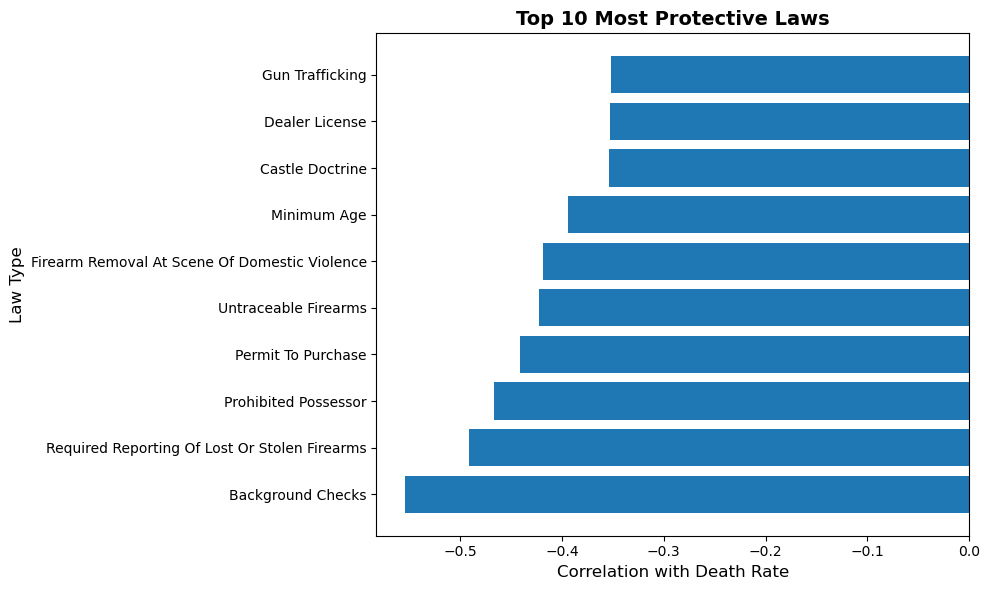

In [15]:
# Visualizations of Top Protective Laws

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_protective['law_type_clean'], top_protective['correlation'])
ax.set_xlabel('Correlation with Death Rate', fontsize=12)
ax.set_ylabel('Law Type', fontsize=12)
ax.set_title('Top 10 Most Protective Laws', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()